<a href="https://colab.research.google.com/github/23ME30056/Flight-delay-prediction/blob/main/Flight_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA for 'Data-Driven Optimization for Airline Operations'**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/My Drive/Data/Dataset.csv'

flight_df = pd.read_csv(path)

pd.set_option('display.max_columns',None)

flight_df.head()

,Used Date,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,ARR,Departure Delay,Arrival Delay,Status,Distance,Passenger Load Factor,Airline Rating,Airport Rating,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Category
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,08:16,816,-1,1,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,06:55,655,-14,-5,1,1244,89.0,0.7,0.88,47.5,81.1,11,Partly cloudy,0,90,9,1012,57,0
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,08:02,802,-11,-13,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,-13,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,4,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,1


In [3]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Used Date                            10718 non-null  object 
 1   From                                 10718 non-null  object 
 2   To                                   10718 non-null  object 
 3   Airline                              10718 non-null  object 
 4   Scheduled Departure                  10718 non-null  object 
 5   SDEP                                 10718 non-null  int64  
 6   Departure                            10718 non-null  object 
 7   DEP                                  10718 non-null  int64  
 8   Scheduled Arrival                    10718 non-null  object 
 9   SARR                                 10718 non-null  int64  
 10  Arrival                              10718 non-null  object 
 11  ARR                         

In [4]:
flight_df.columns

Index(['Used Date', 'From', 'To', 'Airline', 'Scheduled Departure', 'SDEP',
       'Departure', 'DEP', 'Scheduled Arrival', 'SARR', 'Arrival', 'ARR',
       'Departure Delay', 'Arrival Delay', 'Status', 'Distance',
       'Passenger Load Factor', 'Airline Rating', 'Airport Rating',
       'Market Share', 'OTP Index', 'weather__hourly__windspeedKmph',
       'weather__hourly__weatherDesc__value', 'weather__hourly__precipMM',
       'weather__hourly__humidity', 'weather__hourly__visibility',
       'weather__hourly__pressure', 'weather__hourly__cloudcover', 'Category'],
      dtype='object')

In [5]:
flight_df.isnull().sum()

,0
Used Date,0
From,0
To,0
Airline,0
Scheduled Departure,0
SDEP,0
Departure,0
DEP,0
Scheduled Arrival,0
SARR,0


In [6]:
flight_df.shape

(10718, 29)

In [7]:
columns = ["Category"]
flight_df  = flight_df.drop(columns,axis=1)

In [8]:
# categorical_cols = ['From', 'To', 'Airline',  'weather__hourly__weatherDesc__value '] # cat columns
# for col in categorical_cols:
#     print(f"Unique values in {col}: {flight_df[col].nunique()}")

Unique values in From: 4
Unique values in To: 3
Unique values in Airline: 7


KeyError: 'weather__hourly__weatherDesc__value '

In [9]:
new_names= {
    'weather__hourly__windspeedKmph': 'windspeed_Kmph',
    'weather__hourly__weatherDesc__value': 'weatherDesc_value_per_hr',
    'weather__hourly__precipMM': 'precipMM_per_hr',
    'weather__hourly__humidity': 'humidity_per_hr',
    'weather__hourly__visibility' : 'visibility_per_hr',
    'weather__hourly__pressure' : 'pressure_per_hr',
    'weather__hourly__cloudcover' : 'cloudcover_per_hr',
    'Used Date' : 'Date',
    'Scheduled Departure' : 'Scheduled_Departure',
    'Scheduled Arrival' : 'Scheduled_Arrival',
    'Departure Delay': 'Departure_Delay',
    'Arrival Delay' : 'Arrival_Delay',
    'OTP Index' : 'OTP_Index',
    'Passenger Load Factor' : 'Passenger_Load_Factor',
    'Airline Rating' : 'Airline_Rating',
    'Airport Rating' : 'Airport_Rating',
    'Market Share' : 'Market_Share'
}

flight_df.rename(columns=new_names, inplace=True)

flight_df.head()

,Date,From,To,Airline,Scheduled_Departure,SDEP,Departure,DEP,Scheduled_Arrival,SARR,Arrival,ARR,Departure_Delay,Arrival_Delay,Status,Distance,Passenger_Load_Factor,Airline_Rating,Airport_Rating,Market_Share,OTP_Index,windspeed_Kmph,weatherDesc_value_per_hr,precipMM_per_hr,humidity_per_hr,visibility_per_hr,pressure_per_hr,cloudcover_per_hr
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,08:16,816,-1,1,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,06:55,655,-14,-5,1,1244,89.0,0.7,0.88,47.5,81.1,11,Partly cloudy,0,90,9,1012,57
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,08:02,802,-11,-13,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,19:42,1942,0,-13,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,4,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57


In [10]:
flight_df['Date']= pd.to_datetime(flight_df.Date, dayfirst=True)

flight_df['Date'].nunique(dropna=True)

246

In [11]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      10718 non-null  datetime64[ns]
 1   From                      10718 non-null  object        
 2   To                        10718 non-null  object        
 3   Airline                   10718 non-null  object        
 4   Scheduled_Departure       10718 non-null  object        
 5   SDEP                      10718 non-null  int64         
 6   Departure                 10718 non-null  object        
 7   DEP                       10718 non-null  int64         
 8   Scheduled_Arrival         10718 non-null  object        
 9   SARR                      10718 non-null  int64         
 10  Arrival                   10718 non-null  object        
 11  ARR                       10718 non-null  int64         
 12  Departure_Delay   

In [12]:
flight_df['From'].unique()

array(['DEL', 'BLR', 'BOM', 'CCU'], dtype=object)

In [14]:
positive_delay= flight_df[flight_df.Departure_Delay>0]

positive_delay

,Date,From,To,Airline,Scheduled_Departure,SDEP,Departure,DEP,Scheduled_Arrival,SARR,Arrival,ARR,Departure_Delay,Arrival_Delay,Status,Distance,Passenger_Load_Factor,Airline_Rating,Airport_Rating,Market_Share,OTP_Index,windspeed_Kmph,weatherDesc_value_per_hr,precipMM_per_hr,humidity_per_hr,visibility_per_hr,pressure_per_hr,cloudcover_per_hr
4,2020-01-30,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,22:14,2214,4,4,1,1244,85.0,0.5,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
5,2020-01-30,DEL,HYD,Air India,07:05,705,-1,-1,09:10,910,-1,-1,1440,1440,0,1244,80.0,0.5,0.88,12.0,64.2,11,Partly cloudy,0,90,9,1012,57
6,2020-01-30,DEL,HYD,Air India,09:45,945,09:53,953,11:55,1155,-1,1206,8,11,1,1244,80.0,0.5,0.88,12.0,64.2,11,Partly cloudy,0,90,9,1012,57
7,2020-01-30,DEL,HYD,Air India,13:15,1315,15:03,1503,15:15,1515,-1,1730,108,135,1,1244,80.0,0.5,0.88,12.0,64.2,11,Partly cloudy,0,90,9,1012,57
9,2020-01-30,DEL,HYD,Air India,21:10,2110,22:02,2202,23:30,2330,-1,5,52,35,1,1244,80.0,0.5,0.88,12.0,64.2,11,Partly cloudy,0,90,9,1012,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,2019-01-27,CCU,DEL,SpiceJet,18:30,1830,18:35,1835,20:55,2055,21:00,2100,5,5,1,1312,90.9,0.4,0.86,13.3,69.2,9,Partly cloudy,0,50,10,1017,61
10711,2019-01-26,BOM,DEL,Vistara,13:20,1320,13:28,1328,15:30,1530,15:35,1535,8,5,1,1138,84.2,0.8,0.90,3.8,75.3,15,Sunny,0,43,10,1017,0
10715,2019-01-22,CCU,DEL,SpiceJet,18:30,1830,18:38,1838,20:55,2055,21:06,2106,8,11,1,1312,90.9,0.4,0.86,13.3,69.2,5,Clear,0,28,10,1015,0
10716,2019-01-09,DEL,HYD,Spicejet,22:05,2205,00:40,40,00:25,25,02:52,252,155,147,1,1244,90.9,0.4,0.88,13.3,69.2,8,Patchy rain possible,1,55,9,997,85


In [15]:
# count total no of delays in arrival based on airline and on weather description

# Group by airline and weather description, then count the number of positive arrival delays
delay_counts = flight_df[flight_df['Arrival_Delay'] > 0].groupby(['Airline', 'weatherDesc_value_per_hr'])['Arrival_Delay'].count()

delay_counts

Airline   weatherDesc_value_per_hr      
Air Asia  Clear                             58
          Cloudy                            36
          Light rain shower                 25
          Mist                               3
          Moderate or heavy rain shower     15
                                            ..
Vistara   Patchy light rain with thunder     2
          Patchy rain possible              88
          Sunny                             86
          Thundery outbreaks possible        1
          Torrential rain shower             9
Name: Arrival_Delay, Length: 99, dtype: int64

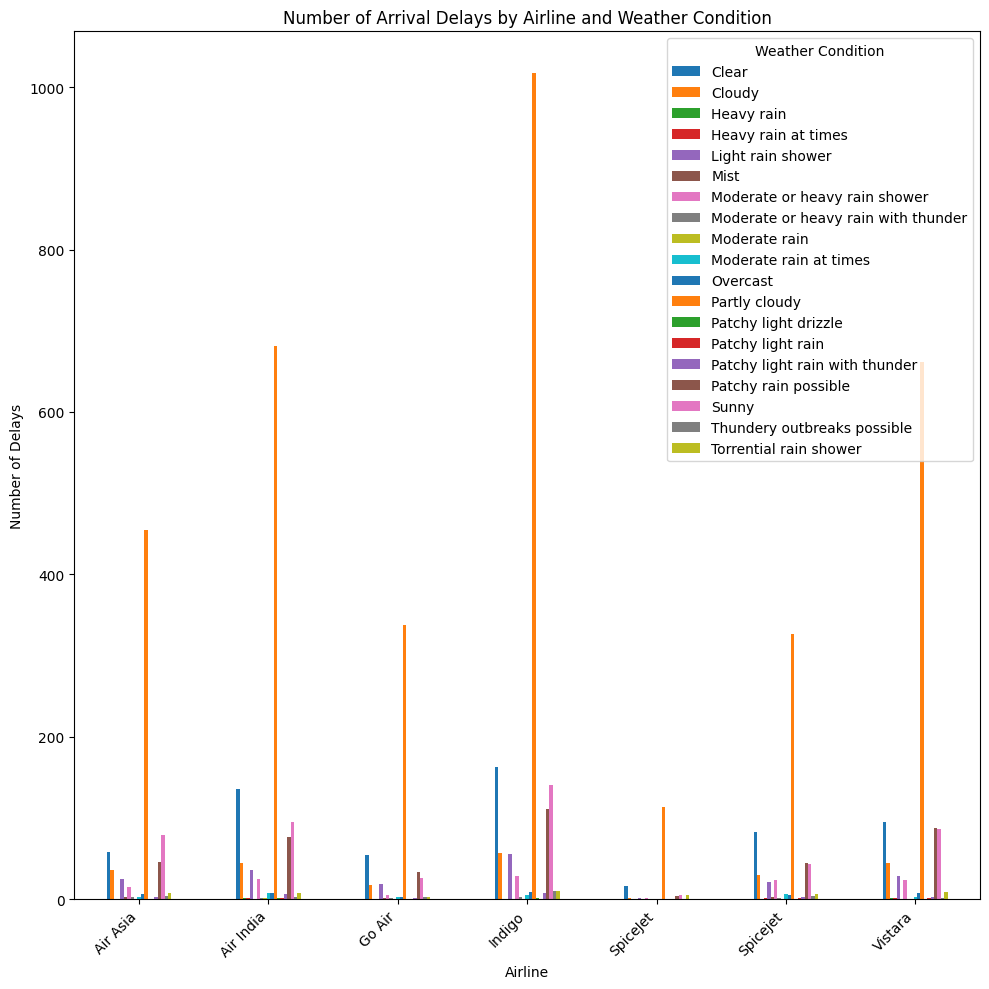

In [16]:
# prompt: generate a bar plot for delay_counts

# Assuming 'delay_counts' is already calculated as in the provided code.
delay_counts.unstack().plot(kind='bar', figsize=(10, 10))
plt.title('Number of Arrival Delays by Airline and Weather Condition')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()

Most arrival delays are on cloudy days

In [17]:
total_delays=flight_df[flight_df['Arrival_Delay'] > 0].groupby('Airline')['Arrival_Delay'].count()

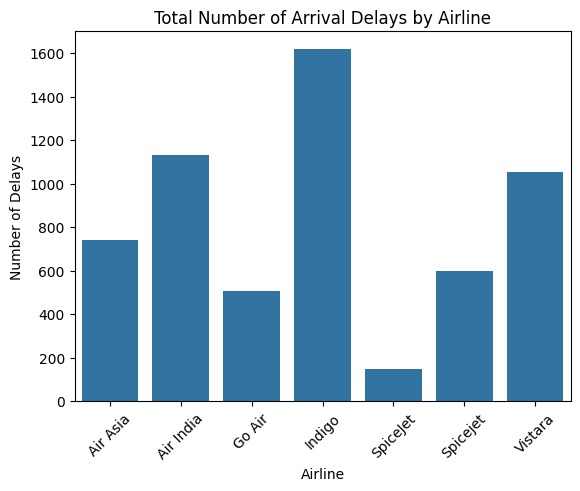

In [18]:
sns.barplot(x=total_delays.index, y=total_delays.values)
plt.title('Total Number of Arrival Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-b12815a39e01>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_delay_counts.index, y=wind_delay_counts.values, palette='viridis')


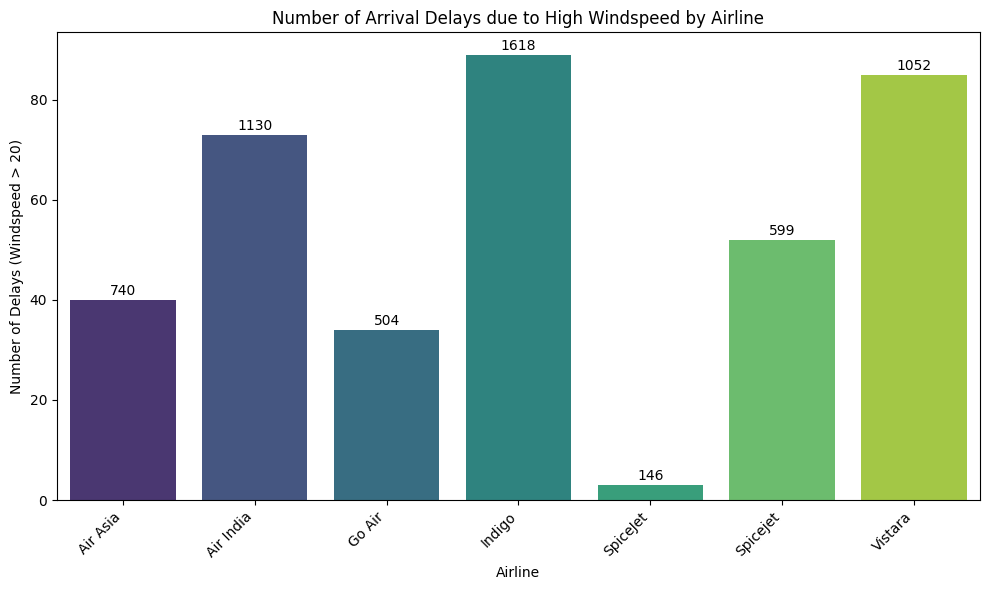

In [19]:
# prompt: draw a bar graph for airlines based on no of flights delayed due to wind speed.legend based on count of total delays of an airline and y axis is windspeed

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'flight_df' and 'total_delays' are already defined from your previous code.

# Filter for delays due to wind speed (you might need to adjust the threshold)
wind_delays = flight_df[(flight_df['Arrival_Delay'] > 0) & (flight_df['windspeed_Kmph'] > 20)] # Example threshold: windspeed > 20

# Group by airline and count the number of delays due to wind
wind_delay_counts = wind_delays.groupby('Airline')['Arrival_Delay'].count()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=wind_delay_counts.index, y=wind_delay_counts.values, palette='viridis')

# Add total delay counts as legend labels
for i, v in enumerate(wind_delay_counts.values):
    plt.text(i, v + 1, str(total_delays[wind_delay_counts.index[i]]), ha='center')  # Adjust vertical offset (+1) as needed


plt.title('Number of Arrival Delays due to High Windspeed by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays (Windspeed > 20)') # Update y-axis label
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

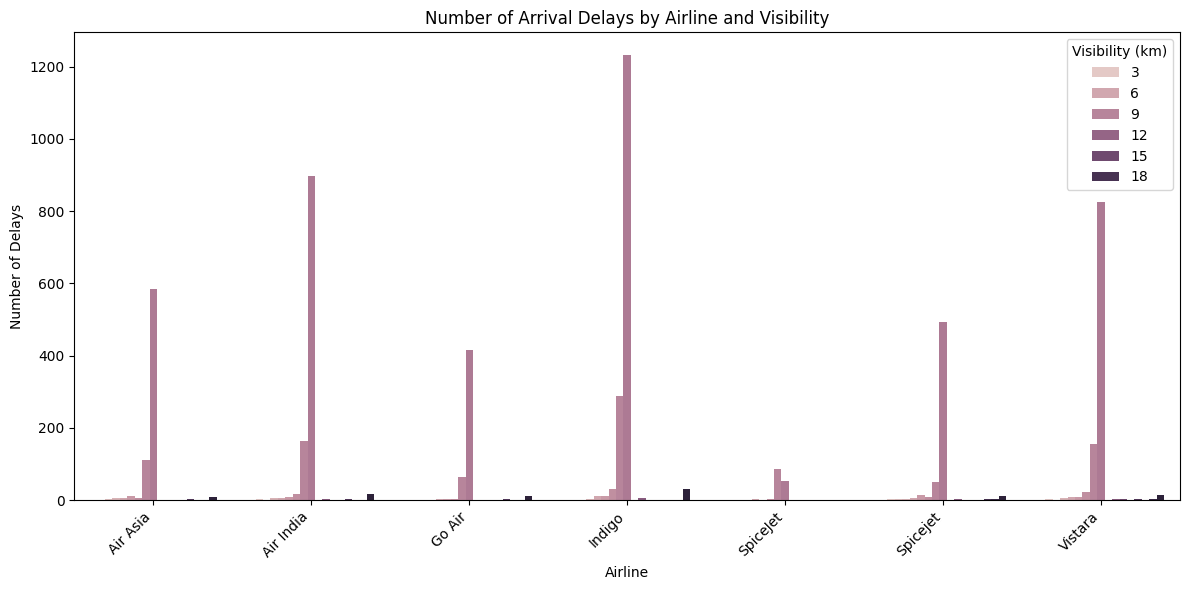

In [20]:
# prompt: draw a bar graph for visibilty vs number of delays for less visibility(<9) for each airline

# Group data by airline and visibility, then count delays
visibility_delays = flight_df[flight_df['Arrival_Delay'] > 0].groupby(['Airline', 'visibility_per_hr'])['Arrival_Delay'].count().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Arrival_Delay', hue='visibility_per_hr', data=visibility_delays)
plt.title('Number of Arrival Delays by Airline and Visibility')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visibility (km)')
plt.tight_layout()
plt.show()

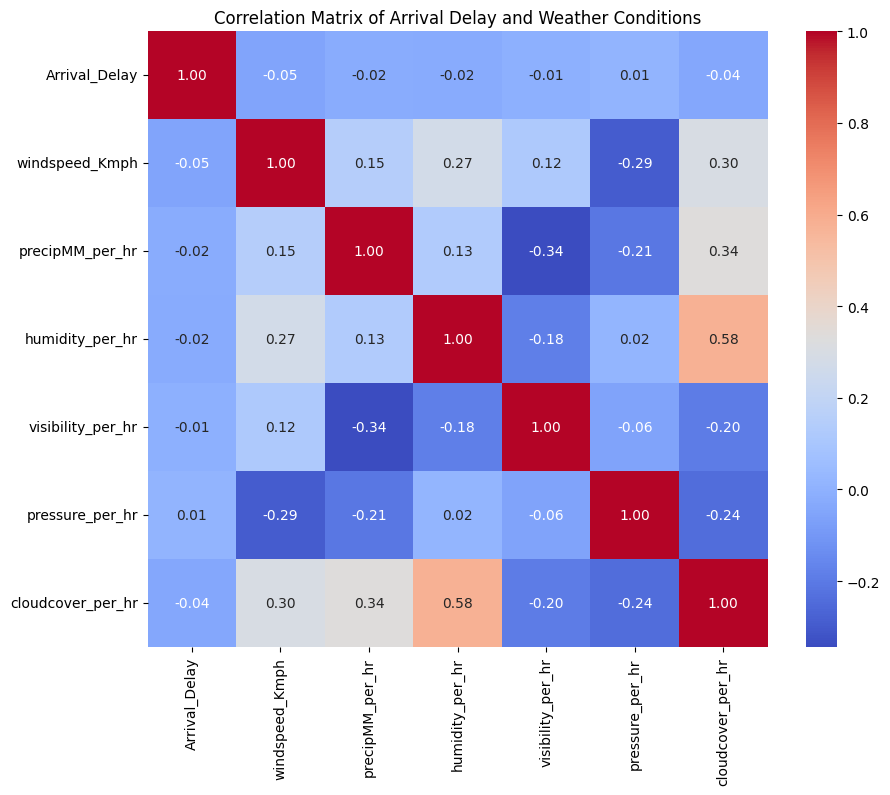

In [22]:
# prompt: Correlation matrix between arrival delay and weather conditions

# Calculate the correlation matrix
correlation_matrix = flight_df[['Arrival_Delay', 'windspeed_Kmph', 'precipMM_per_hr', 'humidity_per_hr', 'visibility_per_hr', 'pressure_per_hr', 'cloudcover_per_hr']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Arrival Delay and Weather Conditions')
plt.show()

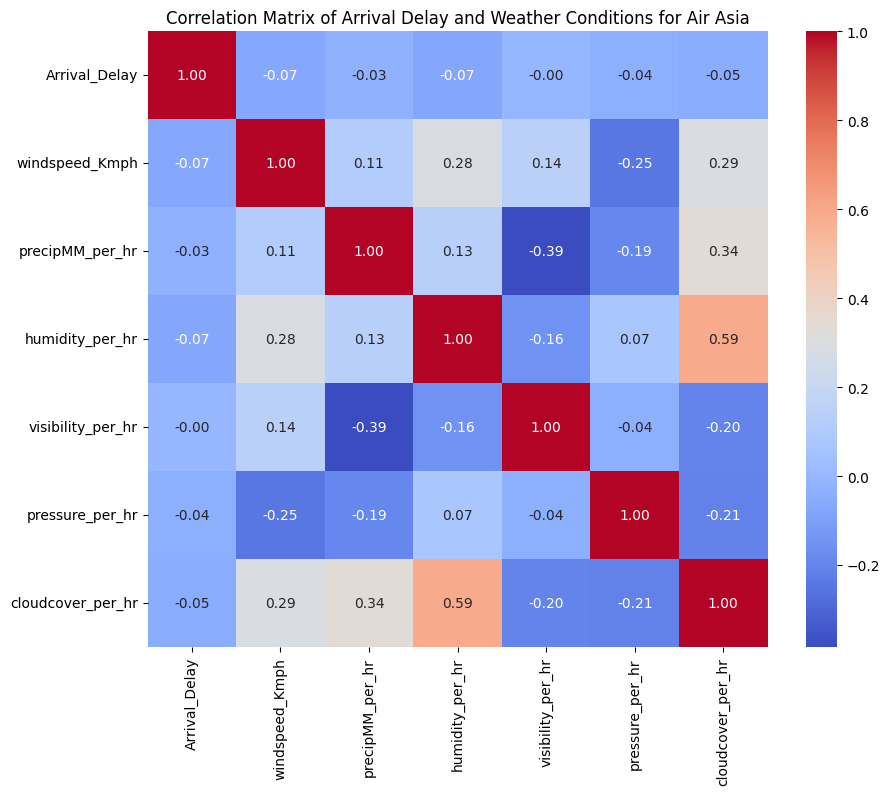

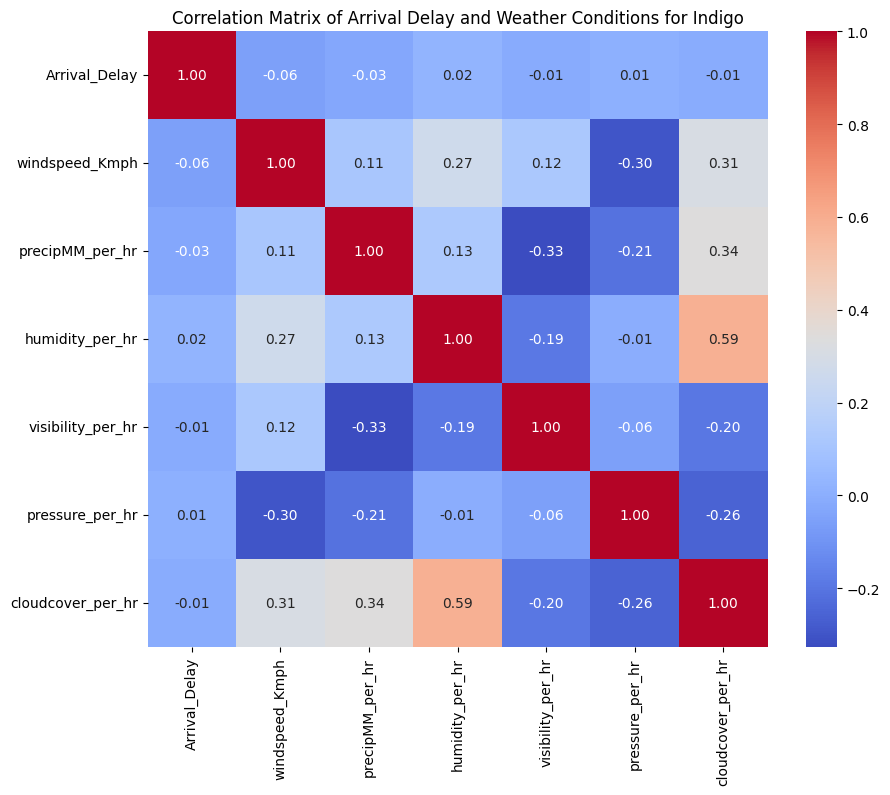

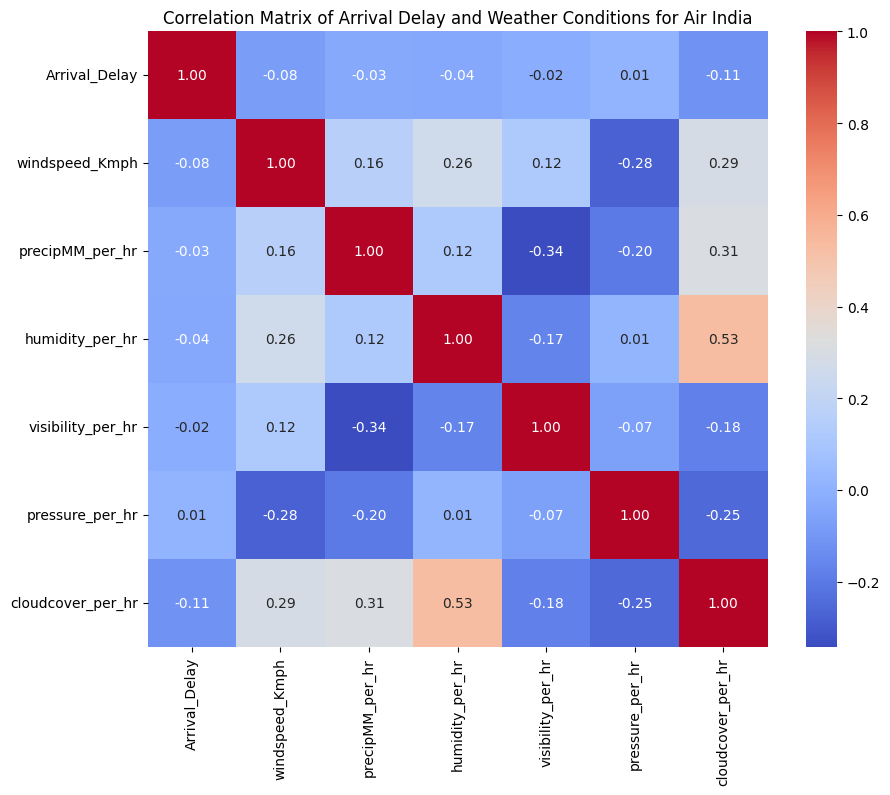

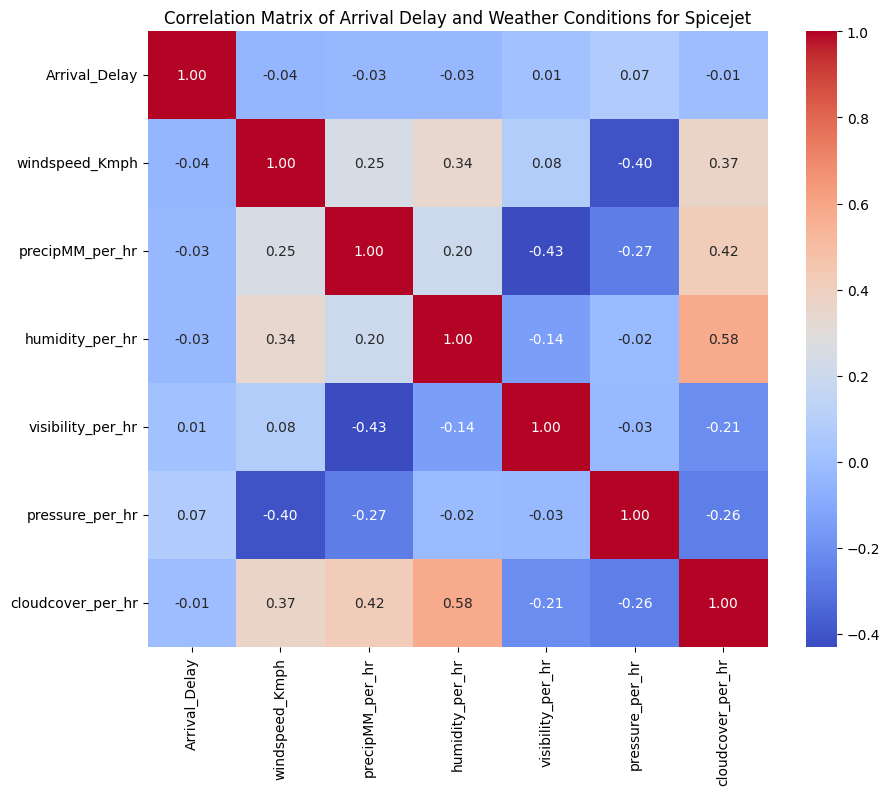

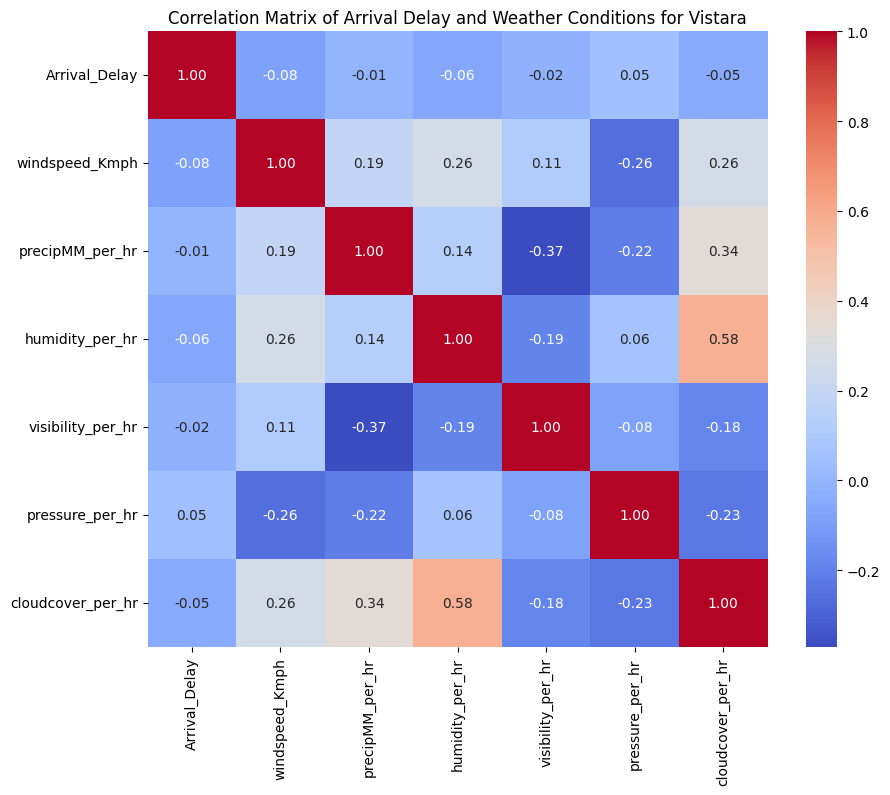

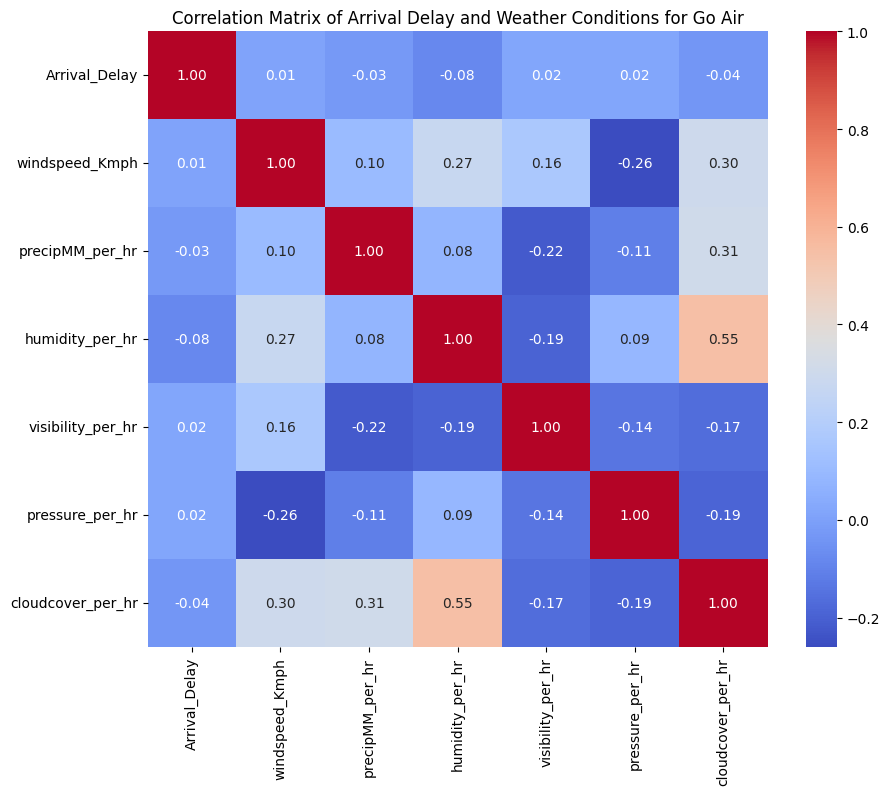

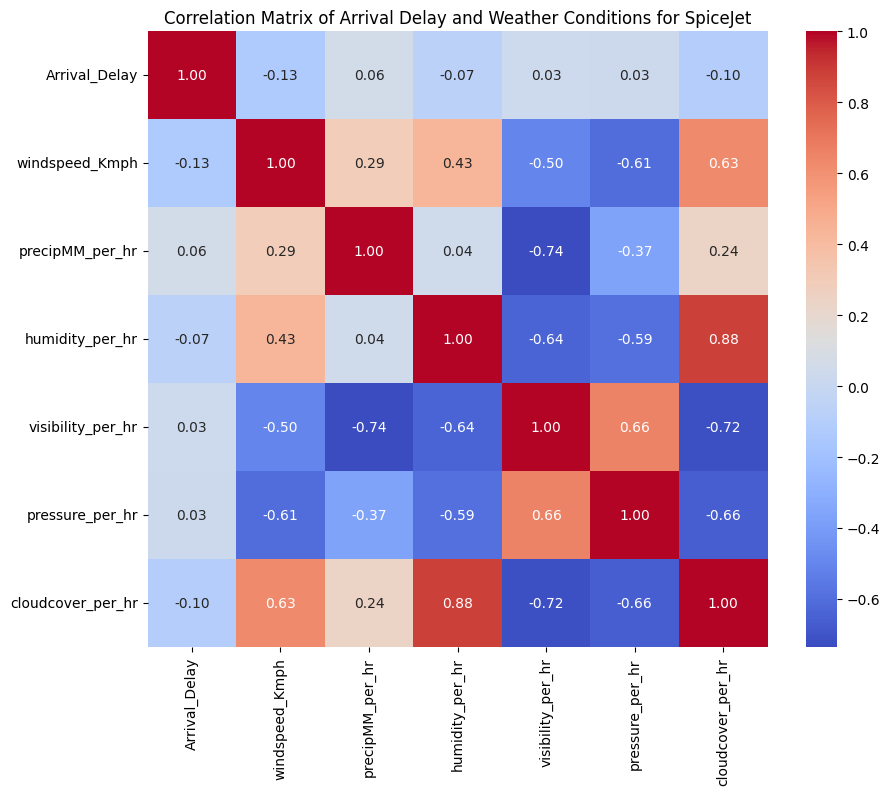

In [23]:
# prompt: Correlation matrix between each airline and weather conditions

# Calculate the correlation matrix for each airline
airline_correlation = {}
for airline in flight_df['Airline'].unique():
    airline_data = flight_df[flight_df['Airline'] == airline]
    correlation_matrix = airline_data[['Arrival_Delay', 'windspeed_Kmph', 'precipMM_per_hr', 'humidity_per_hr', 'visibility_per_hr', 'pressure_per_hr', 'cloudcover_per_hr']].corr()
    airline_correlation[airline] = correlation_matrix

# Print or visualize the correlation matrices for each airline
for airline, matrix in airline_correlation.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix of Arrival Delay and Weather Conditions for {airline}')
    plt.show()

             Feature  Mutual Information
5  cloudcover_per_hr            0.034015
2    humidity_per_hr            0.026057
0     windspeed_Kmph            0.024603
4    pressure_per_hr            0.015701
3  visibility_per_hr            0.015165
1    precipMM_per_hr            0.000000


<ipython-input-25-346048a99658>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')


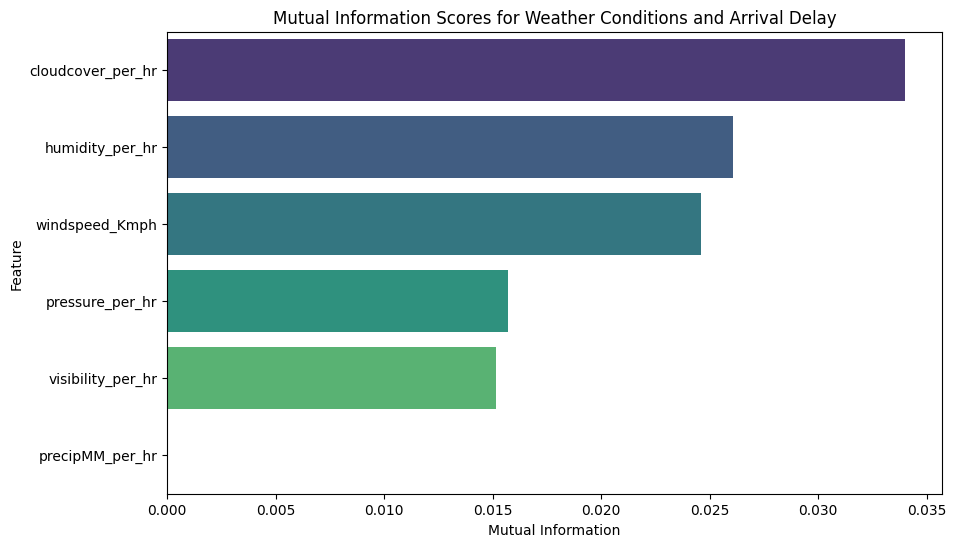

In [25]:
# prompt: generate mutual information classification using weather conditions on target variable arrival delay
from sklearn.feature_selection import mutual_info_regression

# Assuming 'flight_df' is already loaded and preprocessed as in the previous code.

# Select relevant features and target variable
features = ['windspeed_Kmph', 'precipMM_per_hr', 'humidity_per_hr', 'visibility_per_hr', 'pressure_per_hr', 'cloudcover_per_hr']
target = 'Arrival_Delay'

# Calculate mutual information
mi_scores = mutual_info_regression(flight_df[features], flight_df[target])

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': features, 'Mutual Information': mi_scores})

# Sort the DataFrame by mutual information scores
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print or visualize the results
print(mi_df)

# You can also visualize the mutual information scores using a bar plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores for Weather Conditions and Arrival Delay')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()

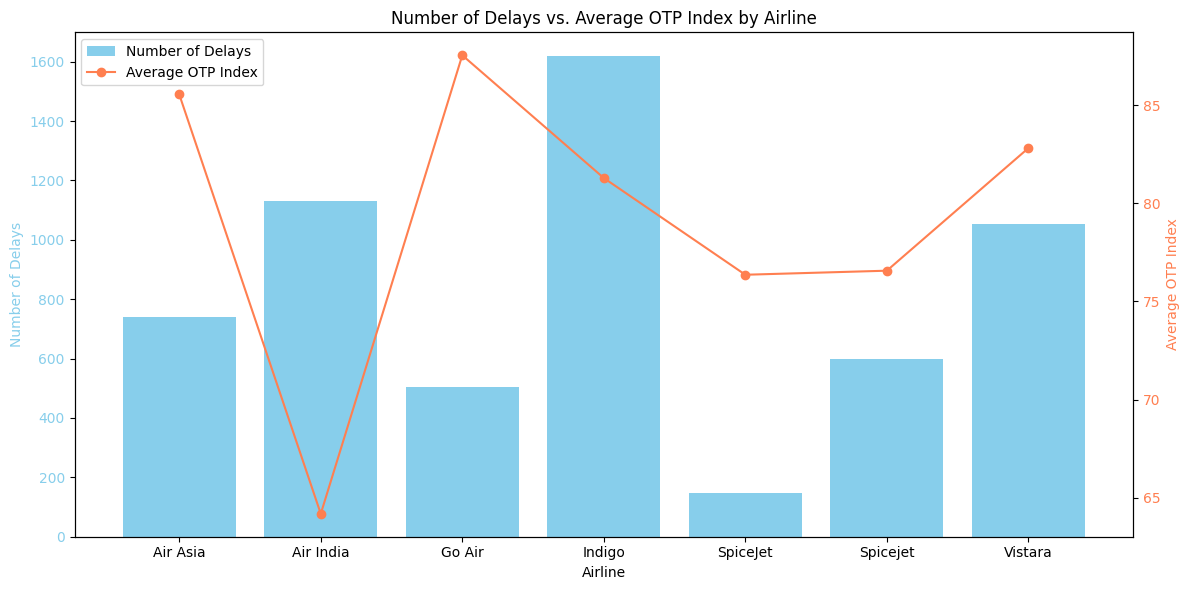

In [26]:
# prompt: number of delays vs average otp index for every airline on 2 y axes and bar graph

import matplotlib.pyplot as plt

# Assuming 'flight_df' is already loaded and processed

# Group data by airline and calculate the number of delays and average OTP index
airline_stats = flight_df.groupby('Airline').agg(
    num_delays=('Arrival_Delay', lambda x: (x > 0).sum()),  # Count delays
    avg_otp=('OTP_Index', 'mean')  # Calculate average OTP index
)

# Create the dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of delays
ax1.bar(airline_stats.index, airline_stats['num_delays'], color='skyblue', label='Number of Delays')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Number of Delays', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for the average OTP index
ax2.plot(airline_stats.index, airline_stats['avg_otp'], color='coral', marker='o', label='Average OTP Index')
ax2.set_ylabel('Average OTP Index', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Set plot title and legend
plt.title('Number of Delays vs. Average OTP Index by Airline')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                  Feature  Mutual Information
9            Market_Share            0.158064
6   Passenger_Load_Factor            0.141232
10              OTP_Index            0.127979
7          Airline_Rating            0.093944
5       cloudcover_per_hr            0.037871
2         humidity_per_hr            0.034207
4         pressure_per_hr            0.020487
8          Airport_Rating            0.017997
0          windspeed_Kmph            0.016550
3       visibility_per_hr            0.015597
1         precipMM_per_hr            0.008814


<ipython-input-27-cf1d1826ea48>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')


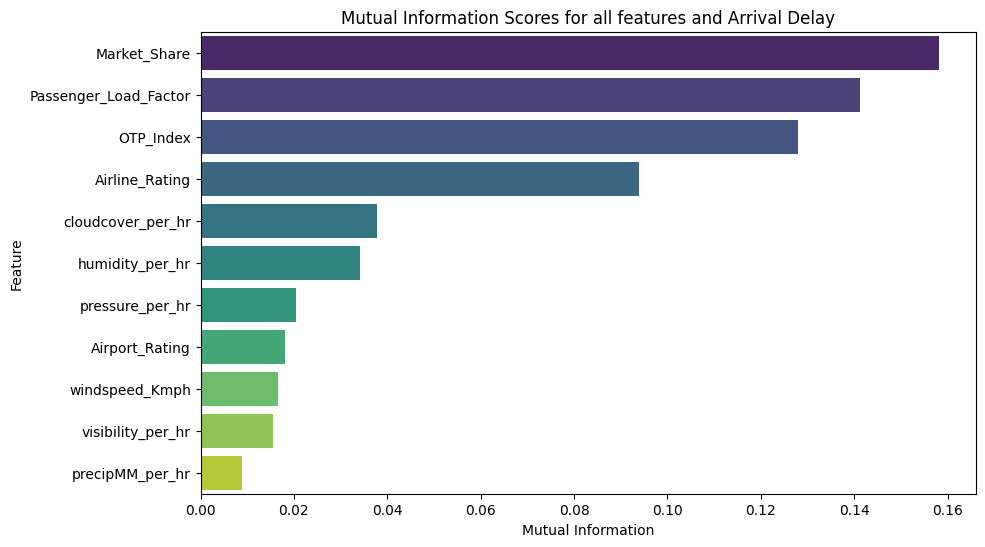

In [27]:
# prompt: mutual information on target variable arrival delay using all features

from sklearn.feature_selection import mutual_info_regression

# Assuming 'flight_df' is already loaded and processed

# Select relevant features and target variable
features = ['windspeed_Kmph', 'precipMM_per_hr', 'humidity_per_hr', 'visibility_per_hr', 'pressure_per_hr', 'cloudcover_per_hr', 'Passenger_Load_Factor', 'Airline_Rating', 'Airport_Rating', 'Market_Share','OTP_Index']
target = 'Arrival_Delay'

# Calculate mutual information
mi_scores = mutual_info_regression(flight_df[features], flight_df[target])

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': features, 'Mutual Information': mi_scores})

# Sort the DataFrame by mutual information scores
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print or visualize the results
print(mi_df)

# You can also visualize the mutual information scores using a bar plot:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores for all features and Arrival Delay')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()

In [ ]:
flight_df

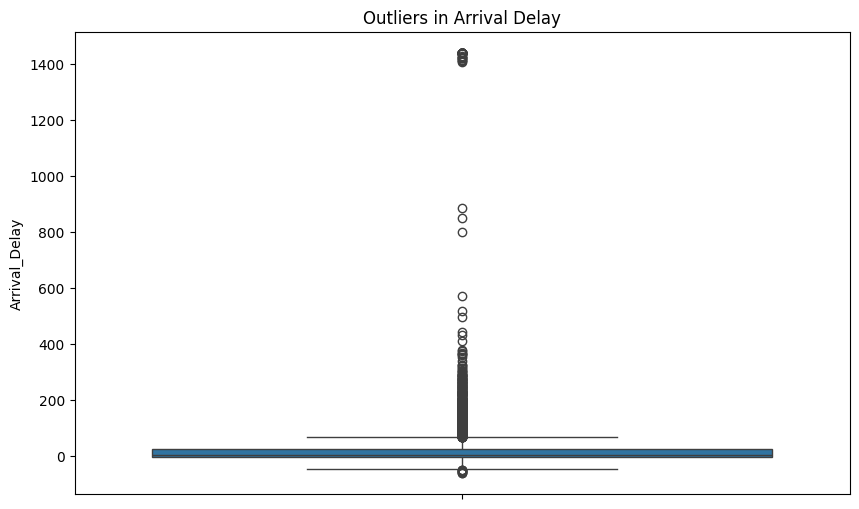

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(flight_df['Arrival_Delay'])
plt.title('Outliers in Arrival Delay')
plt.show()


In [30]:
# applied one hot encoding
catcol = ['From', 'To', 'Airline', 'weatherDesc_value_per_hr']
for col in catcol:
    print(f"Unique values in {col}: {flight_df[col].nunique()}")
df = pd.get_dummies(flight_df, columns = catcol)
one_hot_cols = df.columns.difference(flight_df.columns)  # Identify newly created columns
df[one_hot_cols] = df[one_hot_cols].astype(int)


Unique values in From: 4
Unique values in To: 3
Unique values in Airline: 7
Unique values in weatherDesc_value_per_hr: 20


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 58 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          10718 non-null  datetime64[ns]
 1   Scheduled_Departure                                           10718 non-null  object        
 2   SDEP                                                          10718 non-null  int64         
 3   Departure                                                     10718 non-null  object        
 4   DEP                                                           10718 non-null  int64         
 5   Scheduled_Arrival                                             10718 non-null  object        
 6   SARR                                                          10718 non-null  int64         
 7   Arri

In [32]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      10718 non-null  datetime64[ns]
 1   From                      10718 non-null  object        
 2   To                        10718 non-null  object        
 3   Airline                   10718 non-null  object        
 4   Scheduled_Departure       10718 non-null  object        
 5   SDEP                      10718 non-null  int64         
 6   Departure                 10718 non-null  object        
 7   DEP                       10718 non-null  int64         
 8   Scheduled_Arrival         10718 non-null  object        
 9   SARR                      10718 non-null  int64         
 10  Arrival                   10718 non-null  object        
 11  ARR                       10718 non-null  int64         
 12  Departure_Delay   

<ipython-input-33-e2e9eec3ddeb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='pastel', edgecolor='black')


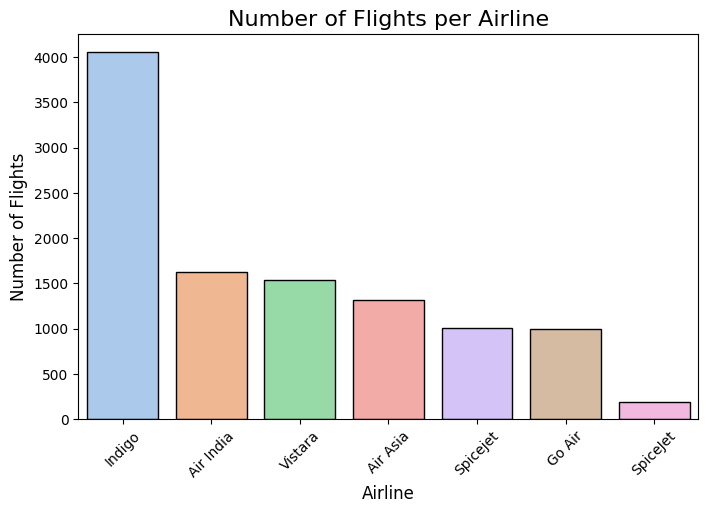

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
airline_counts = flight_df['Airline'].value_counts()
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='pastel', edgecolor='black')
plt.title('Number of Flights per Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)
plt.show()

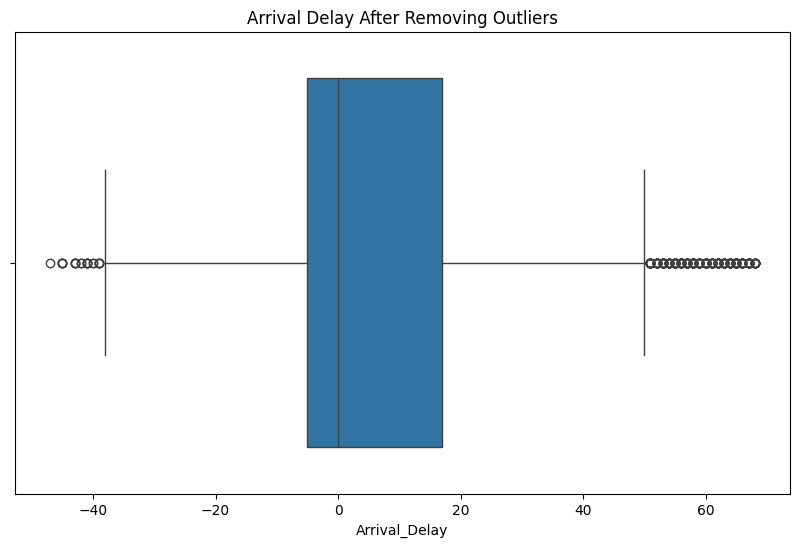

In [35]:
Q1 = flight_df['Arrival_Delay'].quantile(0.25)
Q3 = flight_df['Arrival_Delay'].quantile(0.75)

#  IQR
IQR = Q3 - Q1

#  lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = flight_df[(flight_df['Arrival_Delay'] >= lower_bound) &
                        (flight_df['Arrival_Delay'] <= upper_bound)]


plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Arrival_Delay'])
plt.title('Arrival Delay After Removing Outliers')
plt.show()

In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9815 entries, 0 to 10717
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      9815 non-null   datetime64[ns]
 1   From                      9815 non-null   object        
 2   To                        9815 non-null   object        
 3   Airline                   9815 non-null   object        
 4   Scheduled_Departure       9815 non-null   object        
 5   SDEP                      9815 non-null   int64         
 6   Departure                 9815 non-null   object        
 7   DEP                       9815 non-null   int64         
 8   Scheduled_Arrival         9815 non-null   object        
 9   SARR                      9815 non-null   int64         
 10  Arrival                   9815 non-null   object        
 11  ARR                       9815 non-null   int64         
 12  Departure_Delay         

In [37]:
flight_df['SDEP_Hour'] = flight_df['SDEP'] // 100
flight_df['SDEP_Minute'] = flight_df['SDEP'] % 100
flight_df['SARR_Hour'] = flight_df['SARR'] // 100
flight_df['SARR_Minute'] = flight_df['SARR'] % 100
flight_df['DEP_Hour'] = flight_df['DEP'] // 100
flight_df['DEP_Minute'] = flight_df['DEP'] % 100
flight_df['ARR_Hour'] = flight_df['ARR'] // 100
flight_df['ARR_Minute'] = flight_df['ARR'] % 100
print(flight_df[['SDEP', 'SDEP_Hour', 'SDEP_Minute']].head())

   SDEP  SDEP_Hour  SDEP_Minute
0   605          6            5
1   450          4           50
2   605          6            5
3  1740         17           40
4  1950         19           50


In [38]:
flight_df['Is_Morning_Flight'] = flight_df['SDEP_Hour'].apply(lambda x: 1 if 6 <= x < 12 else 0)
flight_df['Is_Evening_Flight'] = flight_df['SDEP_Hour'].apply(lambda x: 1 if 18 <= x < 24 else 0)

# morning and evening flights
print(flight_df[['SDEP', 'SDEP_Hour', 'Is_Morning_Flight', 'Is_Evening_Flight']].head())

   SDEP  SDEP_Hour  Is_Morning_Flight  Is_Evening_Flight
0   605          6                  1                  0
1   450          4                  0                  0
2   605          6                  1                  0
3  1740         17                  0                  0
4  1950         19                  0                  1
